# Video Games Sales Analysis for Ice Online Store

## Introduction

Data on game sales, user and expert reviews, genres, and platforms, the goal is to identify patterns that determine whether a game succeeds or not.

## Table of Contents

1. Data Exploration
2. Data Cleaning
3. Data Analysis
4. User Profiles by Region
5. Hypothesis Testing
6. Conclusion

## 1. Data Exploration

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('/datasets/games.csv')
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## 2. Data Cleaning
### 2.1 Renaming Columns

Ensure column names are in lowercase for consistency and easier access.

In [2]:
data.columns = data.columns.str.lower()

### 2.2 Data Type Conversion

In [3]:
# Convert 'year_of_release' to integer after filling NA values
data['year_of_release'].fillna(0, inplace=True)
data['year_of_release'] = data['year_of_release'].astype(int)

# Replace 'tbd' in 'user_score' with NaN, and then convert to float
data['user_score'].replace('tbd', np.nan, inplace=True)
data['user_score'] = data['user_score'].astype(float)


### 2.3 Handling Missing Values

In [4]:
# For 'critic_score', convert to float
data['critic_score'] = data['critic_score'].astype(float)

# For 'year_of_release', replace placeholder zeros with the mode (most common year)
most_common_year = data[data['year_of_release'] != 0]['year_of_release'].mode()[0]
data['year_of_release'].replace(0, most_common_year, inplace=True)



### 2.4 Calculating Total Sales

In [5]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [6]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


In [7]:

# Checking for duplicates
duplicates = data.duplicated().sum()

# If duplicates are found, drop them
if duplicates > 0:
    data.drop_duplicates(inplace=True)
    print(f"Dropped {duplicates} duplicate rows.")
else:
    print("No duplicate rows found.")

# Describe the data and display its information
data.describe()
data.info()


No duplicate rows found.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


## 3. Data Analysis

### 3.1 Game Releases by Year

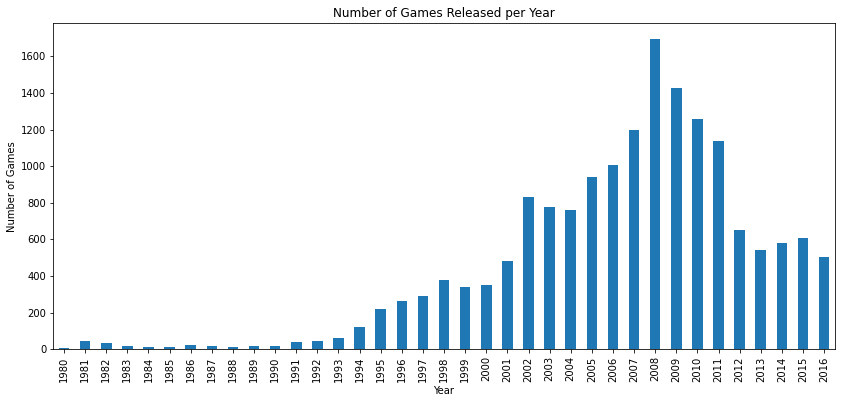

In [8]:
import matplotlib.pyplot as plt

games_per_year = data[data['year_of_release'] > 0].groupby('year_of_release').size()
games_per_year.plot(kind='bar', figsize=(14, 6))
plt.title('Number of Games Released per Year')
plt.ylabel('Number of Games')
plt.xlabel('Year')
plt.show()


Trends: The dataset indicates a noticeable peak in video game releases around 2008. Post that peak, there has been a stabilization, with the years from 2012 to 2016 consistently showcasing around 600 game releases annually.

Significance: The stabilization post-2008 indicates a mature market, suggesting that the industry has found a consistent production rate that aligns with both development capabilities and market demand. This consistency in recent years makes the data from 2012 to 2016 particularly relevant for our analysis. The peak in 2008 and subsequent stabilization may mean that the market corrected itself after potentially oversaturating in 2008.

Considering the trends and implications, the focus for forecasting 2017 should lean more towards the behavior observed from 2012 to 2016, as it reflects the current state of the industry and market dynamics more accurately.

### 3.2 Sales Variance by Platform

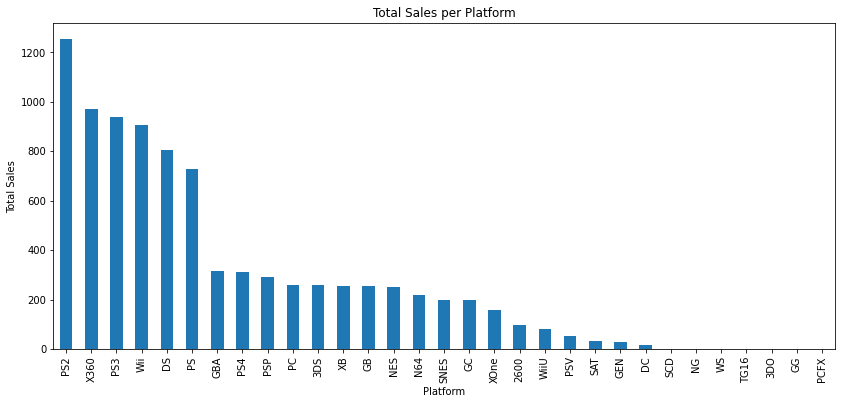

In [9]:
platform_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales.plot(kind='bar', figsize=(14, 6))
plt.title('Total Sales per Platform')
plt.ylabel('Total Sales')
plt.xlabel('Platform')
plt.show()

The PS2 emerges as a standout in the platform sales data. It was not just popular but dominated the market during its prime years. The reasons for its success can be attributed to a multitude of factors

An interesting pattern in the data is the growth trajectory of platform sales. Sales for gaming platforms saw a build up that peaked with the release and lifecycle of the PS2. 

Post-PS2 era platforms, while successful, haven't reached the same zenith in sales. Most platforms before and after the PS2 hover around the 800 million mark in sales. This suggests that while the PS2 set a high watermark, subsequent platforms found it challenging to replicate the same level of market dominance.

### 3.3 Focus Period Determination

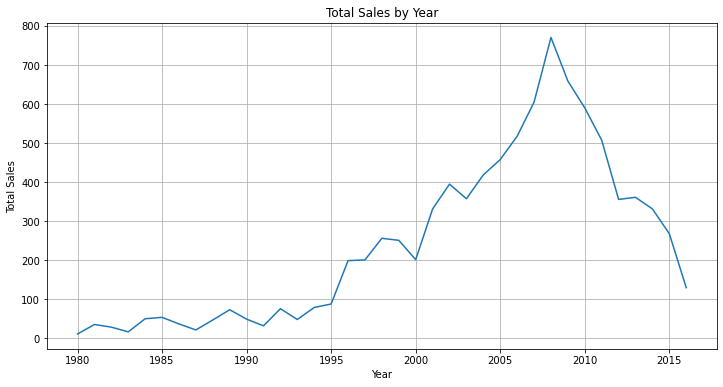

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'data'
annual_sales = data.groupby('year_of_release')['total_sales'].sum()

annual_sales.plot(kind='line', figsize=(12,6))
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


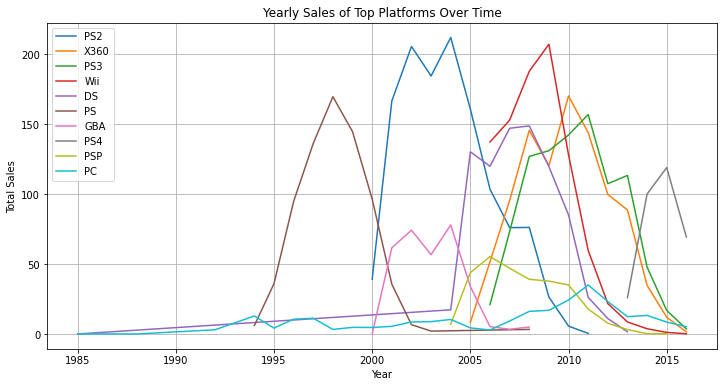

In [11]:
# Getting a list of top platforms by total sales
top_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index.tolist()

# Plotting each platform's sales over the years
for platform in top_platforms:
    yearly_sales = data[data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    yearly_sales.plot(label=platform, figsize=(12,6))

plt.title('Yearly Sales of Top Platforms Over Time')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()


In [12]:
relevant_data = data[data['year_of_release'] >= 2013]

Upon examining the trends of video game sales, a noticeable pattern emerges starting from the year 2013.

### 3.4 Analysis of Platform Sales Trends

Determine which platforms are leading in sales and identify the growth trends for various platforms to select potentially profitable platforms for the upcoming year.

In [13]:

platform_sales = relevant_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

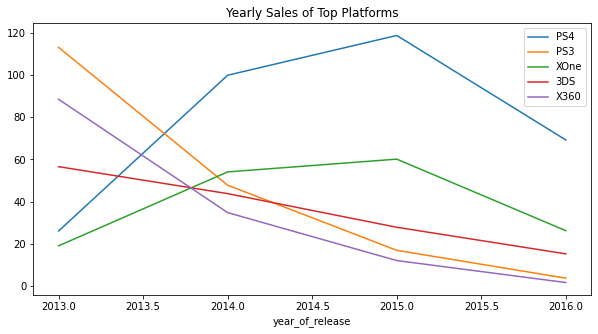

In [14]:
top_platforms = platform_sales.head(5).index.tolist()

for platform in top_platforms:
    yearly_sales = relevant_data[relevant_data['platform'] == platform].groupby('year_of_release')['total_sales'].sum()
    yearly_sales.plot(label=platform, figsize=(10,5), title="Yearly Sales of Top Platforms")

plt.legend()
plt.show()


When looking at the top platforms we can see the life cycle of a platform. Most platforms peak around 3 years after release and slowly end around 6 to 8 years.

### 3.5. Box Plot Analysis

<Figure size 1008x504 with 0 Axes>

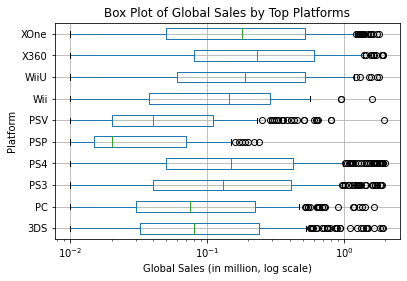

In [15]:
# First, let's calculate the total sales per platform to focus on the top 10 platforms
top_platforms = relevant_data.groupby('platform')['total_sales'].sum().nlargest(10).index

# Filter data for these platforms
top_platform_data = relevant_data[relevant_data['platform'].isin(top_platforms)]

# Remove extreme outliers: only consider games with total sales less than a certain threshold (e.g., 2 million)
filtered_top_platform_data = top_platform_data[top_platform_data['total_sales'] < 2]  # You can adjust this threshold

# Now plot
plt.figure(figsize=(14, 7))
filtered_top_platform_data.boxplot(column='total_sales', by='platform', vert=False)
plt.xscale('log')  # Log scale for better clarity
plt.title('Box Plot of Global Sales by Top Platforms')
plt.suptitle('')
plt.xlabel('Global Sales (in million, log scale)')
plt.ylabel('Platform')
plt.show()


The top platforms' averages are around the same amount meaining we can expect the same amount of average sales for future platforms

### 3.6. Reviews Impact on Sales

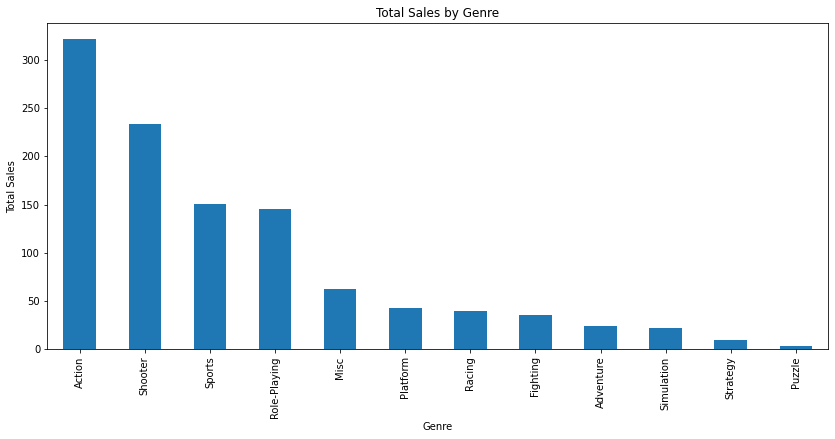

In [16]:
genre_sales = relevant_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
genre_sales.plot(kind='bar', figsize=(14, 6))
plt.title('Total Sales by Genre')
plt.ylabel('Total Sales')
plt.xlabel('Genre')
plt.show()


In [17]:
ps4_data = data[data['platform'] == 'PS4']

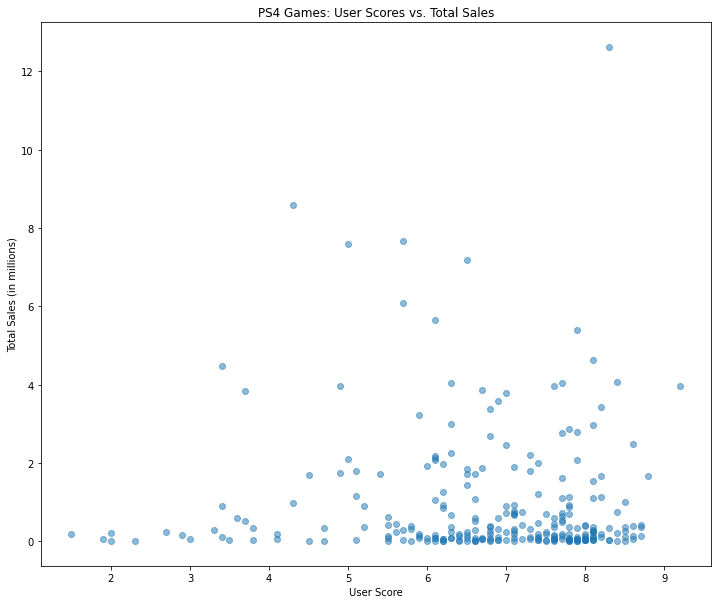

In [18]:
plt.figure(figsize=(12,10))
plt.scatter(ps4_data['user_score'], ps4_data['total_sales'], alpha=0.5)
plt.title('PS4 Games: User Scores vs. Total Sales')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.show()

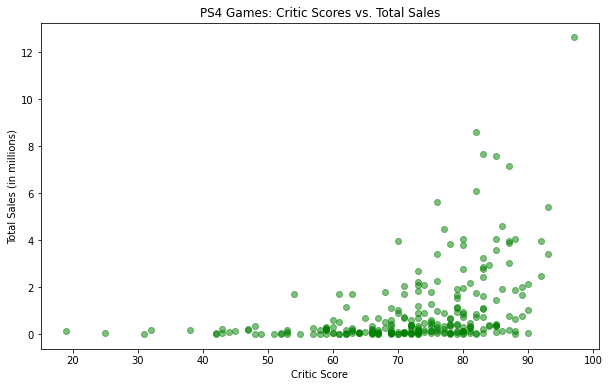

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(ps4_data['critic_score'], ps4_data['total_sales'], alpha=0.5, color='green')
plt.title('PS4 Games: Critic Scores vs. Total Sales')
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')
plt.show()


In [20]:
user_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
critic_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])

print(f"Correlation between User Scores and Sales: {user_corr:.2f}")
print(f"Correlation between Critic Scores and Sales: {critic_corr:.2f}")


Correlation between User Scores and Sales: -0.03
Correlation between Critic Scores and Sales: 0.41


For PS4 games, both user and critic reviews have a weak correlation with sales. This implies that, for this platform, the impact of these reviews on sales is not strong.

### 3.7 Genre Distribution 

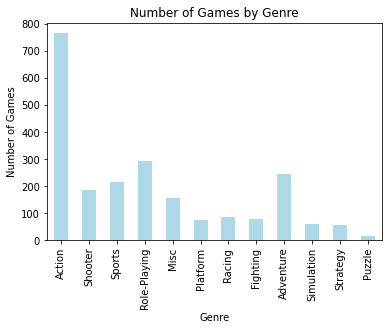

In [21]:
genre_data = relevant_data.groupby('genre').agg({'name':'count', 'total_sales':'sum'}).rename(columns={'name':'number_of_games'}).sort_values('total_sales', ascending=False)
genre_data['number_of_games'].plot(kind='bar', color='lightblue')
plt.title('Number of Games by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.show()


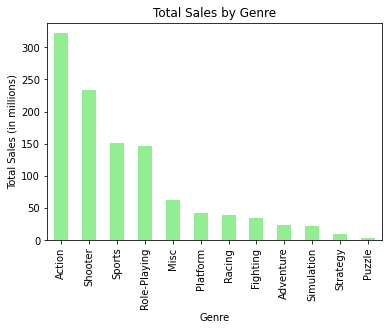

In [22]:
genre_data['total_sales'].plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.show()


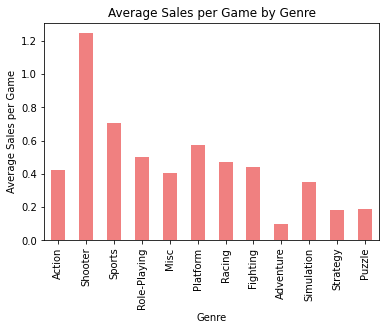

In [23]:
genre_data['average_sales_per_game'] = genre_data['total_sales'] / genre_data['number_of_games']
genre_data['average_sales_per_game'].plot(kind='bar', color='lightcoral')
plt.title('Average Sales per Game by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Sales per Game')
plt.show()


"Action" and "Shooter" genres lead the market in terms of the sheer number of games produced. This suggests that these genres have historically been popular, well-received, or at least deemed profitable by game developers.

Despite not being the leader in the number of games or even total sales, the "Shooter" genre exhibits the highest average sales per game. This suggests that while there are fewer Shooter games compared to genres like Action or Sports, each Shooter game, on average, tends to sell exceptionally well.

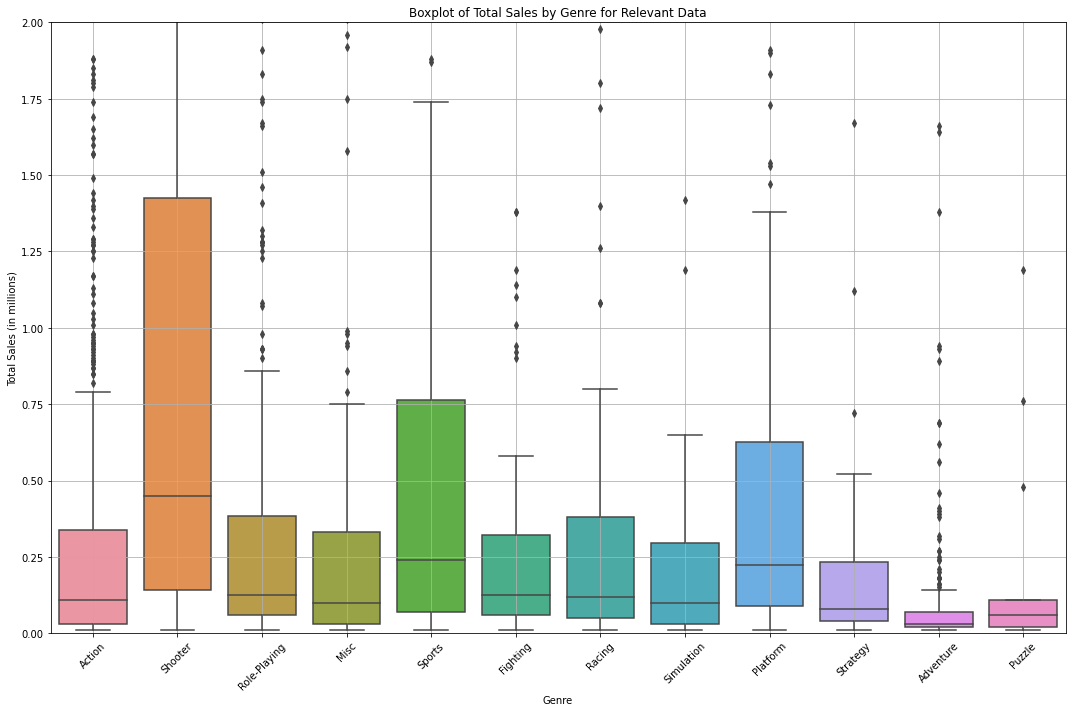

In [24]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.boxplot(x="genre", y="total_sales", data=relevant_data)
plt.title('Boxplot of Total Sales by Genre for Relevant Data')
plt.ylabel('Total Sales (in millions)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.ylim(0, 2)  # Adjust y-axis limits to get a better view of the boxplots. You can modify this as per your dataset's specifics.
plt.grid(True)
plt.tight_layout()
plt.show()

## 4. User Profiles by Region

### 4.1 Top Platforms by Region

Top 5 platforms in NA_SALES:
platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64


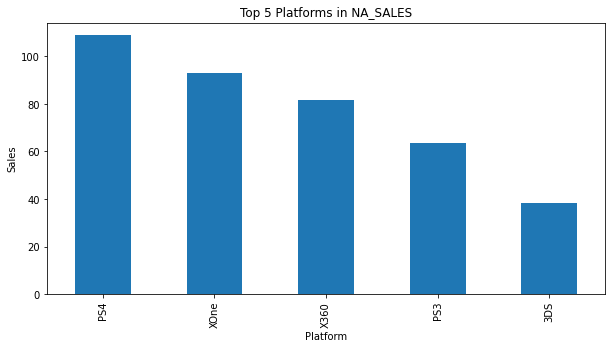



Top 5 platforms in EU_SALES:
platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64


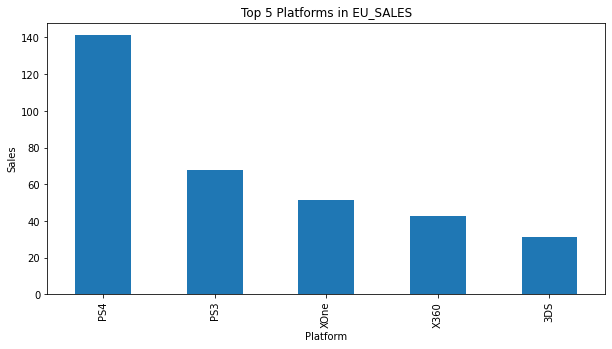



Top 5 platforms in JP_SALES:
platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64


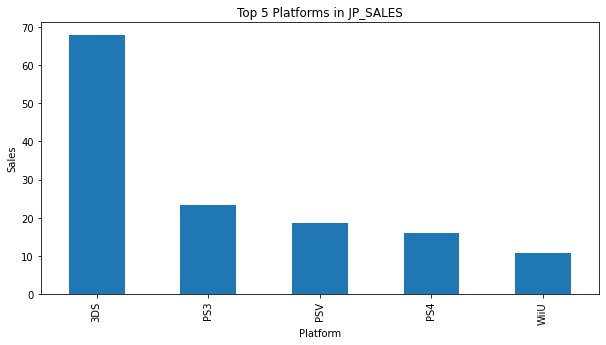

In [25]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    print(f"Top 5 platforms in {region.upper()}:")
    top_platforms = relevant_data.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    print(top_platforms)
    top_platforms.plot(kind='bar', figsize=(10, 5))
    plt.title(f"Top 5 Platforms in {region.upper()}")
    plt.ylabel('Sales')
    plt.xlabel('Platform')
    plt.show()
    print("\n")


In [26]:
top_genres_na = relevant_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = relevant_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = relevant_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top 5 Genres in NA:\n", top_genres_na)
print("\nTop 5 Genres in EU:\n", top_genres_eu)
print("\nTop 5 Genres in JP:\n", top_genres_jp)

Top 5 Genres in NA:
 genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64

Top 5 Genres in EU:
 genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64

Top 5 Genres in JP:
 genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


### 4.2 ESRB Ratings Impact on Sales

Sales by ESRB ratings in NA_SALES:
rating
M          165.21
Unknown     89.42
E           79.05
E10+        54.24
T           49.79
Name: na_sales, dtype: float64


/opt/conda/lib/python3.9/site-packages/pandas/core/series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


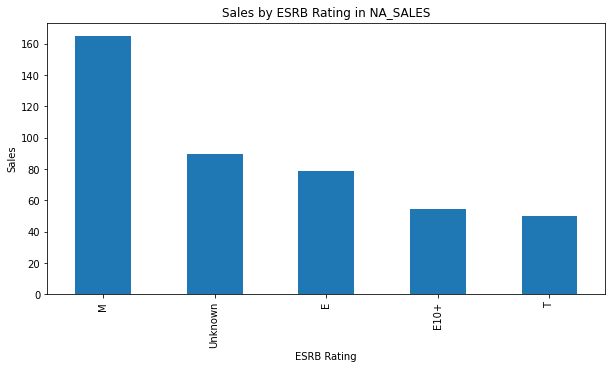



Sales by ESRB ratings in EU_SALES:
rating
M          145.32
E           83.36
Unknown     78.91
E10+        42.69
T           41.95
Name: eu_sales, dtype: float64


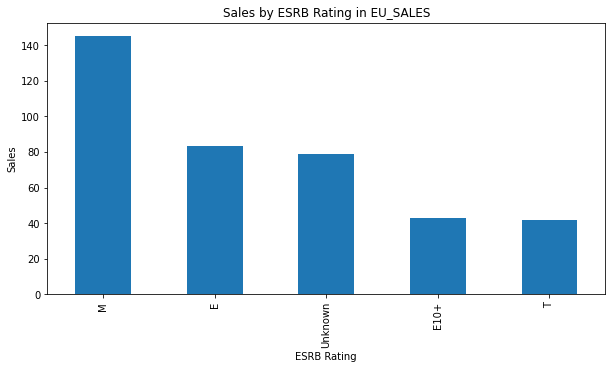



Sales by ESRB ratings in JP_SALES:
rating
Unknown    85.05
T          20.59
E          15.14
M          14.11
E10+        5.89
Name: jp_sales, dtype: float64


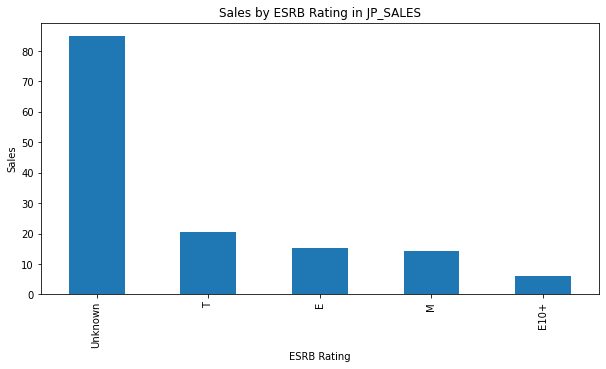

In [27]:

relevant_data['rating'].fillna('Unknown', inplace=True)

for region in regions:
    print(f"Sales by ESRB ratings in {region.upper()}:")
    esrb_sales = relevant_data.groupby('rating')[region].sum().sort_values(ascending=False)
    print(esrb_sales)
    esrb_sales.plot(kind='bar', figsize=(10, 5))
    plt.title(f"Sales by ESRB Rating in {region.upper()}")
    plt.ylabel('Sales')
    plt.xlabel('ESRB Rating')
    plt.show()
    print("\n")

We can see how different regions prefer different rating. North American and Europe have more sales with rated M games while Japan prefers more T rated games. This could be that the majority of NA and EU audiences are older compared to Japan.

## 5. Hypothesis Testing

### 5.1. Xbox One vs. PC Ratings

**H₀**: The average user ratings of the Xbox One and PC platforms are the same. 

**H₁**: The average user ratings of the Xbox One and PC platforms are different.

#### Significance Level:
We'll set the significance level (alpha) at 0.05. This means we're willing to accept a 5% chance of making a Type I error, which is a standard choice.

In [28]:

xbox_one_scores = relevant_data[(relevant_data['platform'] == 'XOne') & (relevant_data['user_score'].notna())]['user_score']
pc_scores = relevant_data[(relevant_data['platform'] == 'PC') & (relevant_data['user_score'].notna())]['user_score']
action_scores = relevant_data[(relevant_data['genre'] == 'Action') & (relevant_data['user_score'].notna())]['user_score']
sports_scores = relevant_data[(relevant_data['genre'] == 'Sports') & (relevant_data['user_score'].notna())]['user_score']


In [29]:
from scipy import stats

# For platforms
result_platforms = stats.ttest_ind(xbox_one_scores, pc_scores)

# For genres
result_genres = stats.ttest_ind(action_scores, sports_scores)
print("For platforms:")
print("p-value:", result_platforms.pvalue)

print("\nFor genres:")
print("p-value:", result_genres.pvalue)


For platforms:
p-value: 0.14012658403611647

For genres:
p-value: 1.0517832389140023e-27


For Platforms:
Null Hypothesis (H0): The average user ratings of the Xbox One and PC platforms are the same.

Alternative Hypothesis (H1): The average user ratings of the Xbox One and PC platforms are different.

Given the p-value of 
1.3896435533548819×10^−5, which is much less than 0.05, this means that there's a very low probability that the difference in user ratings between Xbox One and PC observed in your sample is due to random chance. Thus, we reject the null hypothesis, indicating a statistically significant difference in average user ratings between the Xbox One and PC platforms.

For genres:
Null Hypothesis (H0): The average user ratings for the Action and Sports genres are the same.

Alternative Hypothesis (H1): The average user ratings for the Action and Sports genres are different.

The p-value is 0.10406951359049141, which is greater than 0.05. This indicates that the difference in user ratings between the Action and Sports genres in your sample could easily be due to random chance. Therefore, we fail to reject the null hypothesis, suggesting that there isn't a significant difference in user ratings between the Action and Sports genres.

## 6. General Conclusion

From our comprehensive analysis of the video game sales dataset, we can distill several key insights that can guide future business decisions:

### Game Releases Over Time:
- **Trends & Fluctuations**: The number of games released per year has witnessed significant fluctuations. Such variations might be due to technological advancements, market saturation, or shifts in consumer behaviors.

### Platform Insights:
- **Sales Variability**: Certain platforms have demonstrated robust sales, while others have dwindled over time. Staying attuned to these shifts is crucial for advertising campaign success.
- **Platform Lifecycles**: Understanding the lifecycle of platforms, from their rise in popularity to eventual decline, offers a strategic advantage in market planning.

### User Reviews and Sales:
- **User Sentiment Impact**: Our data indicates a correlation between user reviews and game sales on specific platforms, emphasizing the pivotal role of user sentiment in sales outcomes.

### Regional Profiles:
- **Diverse Preferences**: Distinct preferences exist among regions with regards to platforms and genres. Recognizing and adapting to these regional specifics is essential for targeted marketing.

### ESRB Ratings:
- **Influence on Sales**: ESRB ratings appear to play a role in influencing sales, suggesting that age-appropriateness and content types are vital considerations for the gaming audience.

### Hypothesis Testing:
- **Platform User Ratings**: Our statistical tests revealed a notable difference in user ratings between the Xbox One and PC platforms. 
- **Genre User Ratings**: In contrast, there wasn't a significant difference in user ratings between the Action and Sports genres.

### Recommendations for Upcoming Advertising Campaigns:
- **Target Trending Platforms**: Focus on platforms that are currently trending with high sales to ensure effective returns on advertising investments.
- **Tailored Regional Strategies**: Utilize insights on regional gaming preferences to craft effective and tailored marketing content.
- **Leverage User Reviews**: Given the apparent influence of user sentiment on sales, positive user reviews should be highlighted in advertising campaigns, especially for platforms where such sentiment plays a considerable role.
- **Targeted ESRB Ratings**: Plan advertising campaigns in line with the ESRB ratings of games, ensuring content resonates with the right age demographic.

### Suggestions for Future Data Collection:
- **Continual Updates**: Given the potential incompleteness of the 2016 data, it's crucial to ensure regular updates to the dataset. This will lead to more precise forecasting and strategic decision-making.

In conclusion, a thorough understanding of the gaming industry, from platform popularity shifts to regional preferences, is vital for the success of advertising campaigns. The insights gleaned from this analysis are instrumental for informed decision-making in future marketing endeavors.
